# Classification Project on Water Quality Prediction

In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#libraries required for linear regression
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
import warnings
warnings.filterwarnings("ignore")

#libraries required for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Libraries required for SVM and Naive Bayes
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction

#Libraries required for KNN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Loading the dataset

data = pd.read_csv("C:/Users/dell/Downloads/ipynb datasets/water_potability.csv")

In [3]:
#Data description

data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [4]:
#Information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#Statistical information of the data
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
#Shape of the dataset
data.shape

(3276, 10)

In [7]:
#Top 5 rows
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [8]:
#Bottom 3 rows
data.tail(3)

ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
3273  9.419510  175.762646  33155.578218     7.350233      NaN    432.044783   
3274  5.126763  230.603758  11983.869376     6.303357      NaN    402.883113   
3275  7.874671  195.102299  17404.177061     7.509306      NaN    327.459760   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
3273       11.039070        69.845400   3.298875           1  
3274       11.168946        77.488213   4.708658           1  
3275       16.140368        78.698446   2.309149           1

In [9]:
#no. of unique rows in each column
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [10]:
data.nunique().count()

10

In [11]:
data.isnull().values.sum()

1434

In [12]:
#No. of missing rows in each column
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
#percentage of missing values in each row
(data.isnull().sum()/(len(data)))*100                 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [14]:
#Data type of each column
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<Axes: >

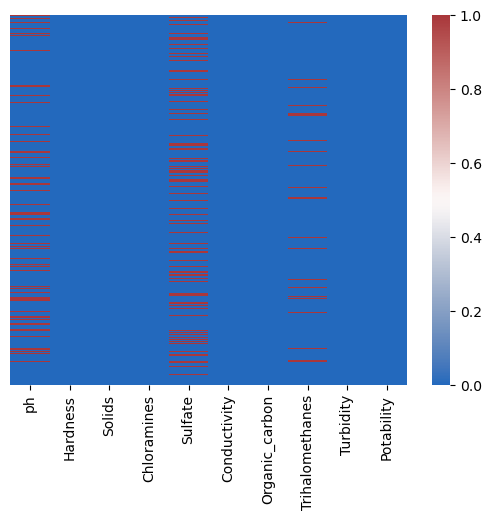

In [15]:
#Visualizing the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

In [16]:
#Handling null values

#Filling the missing values in ph column by bfill method
data['ph'].fillna(method='bfill' , inplace=True)

<Axes: >

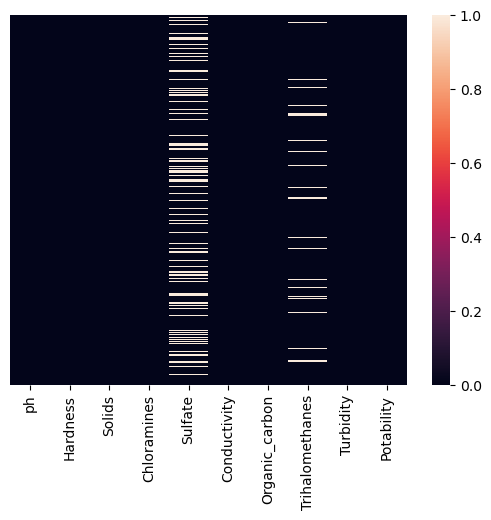

In [17]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='rocket')

In [18]:
#Filling the missing values in Sulfate column by mean method
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)

<Axes: >

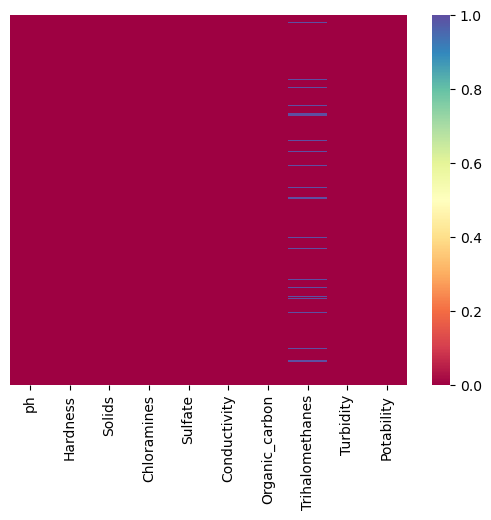

In [19]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="Spectral")

In [20]:
#Filling the missing values in Trihalomethanes column by ffill method
data['Trihalomethanes'].fillna(method='ffill' , inplace=True)

<Axes: >

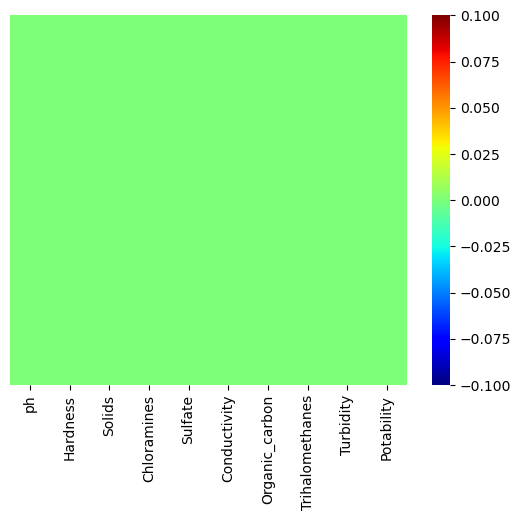

In [21]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='jet')

In [22]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Text(0.5, 1.0, 'Starting 10 Hardness vs Solids')

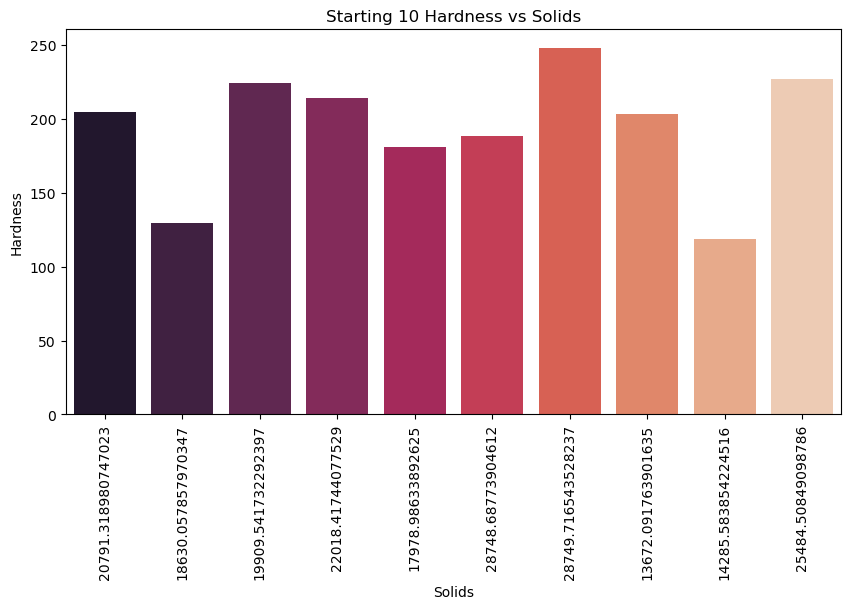

In [23]:
#Plotting the graphs

#Bar plot of the hardness vs solid 
plt.figure(figsize=(10,5))
sns.barplot(y="Hardness", x='Solids', data=data, order=data['Solids'].iloc[:10], palette='rocket')
plt.xticks(rotation=90)
plt.title('Starting 10 Hardness vs Solids')

<BarContainer object of 3276 artists>

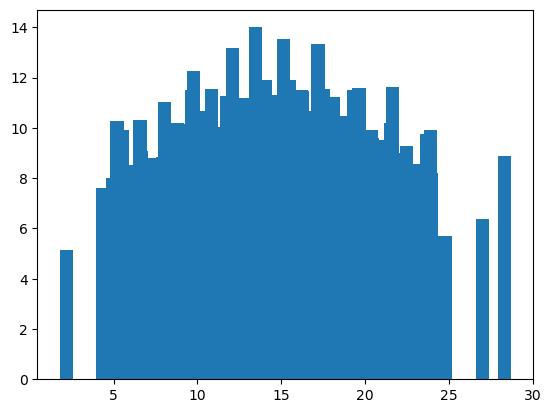

In [24]:
#Bar plot of Organic_carbon vs ph
plt.bar(data['Organic_carbon'],data['ph'])

In [25]:
a = data.groupby('Potability')['Potability'].count()

<Axes: xlabel='Potability'>

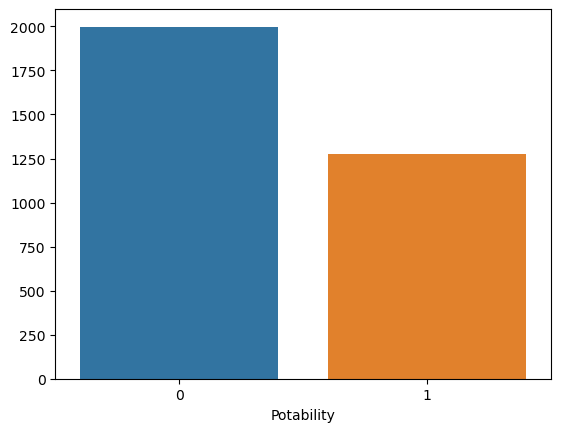

In [26]:
#Bar plot of Potability
sns.barplot(x=a.index, y=a.values)

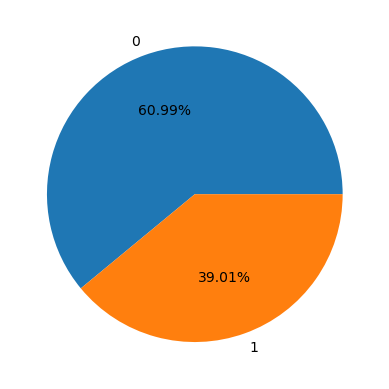

In [27]:
#Pie chart of Potability
plt.pie(a, labels=a.index, autopct='%.2f%%')
plt.show()

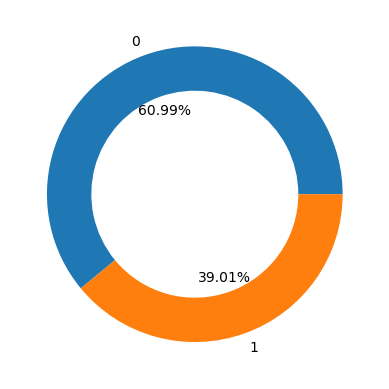

In [28]:
#Donut chart of Potability
plt.pie(a, labels=a.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

<Axes: >

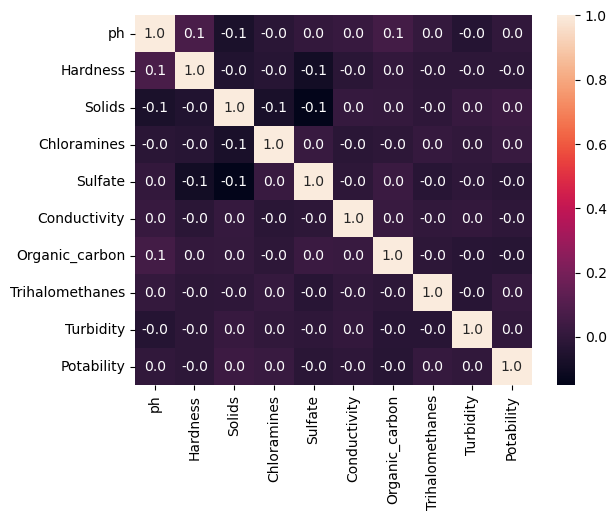

In [29]:
sns.heatmap(data.corr(), annot = True,fmt='.1f')

<Axes: xlabel='Hardness', ylabel='Count'>

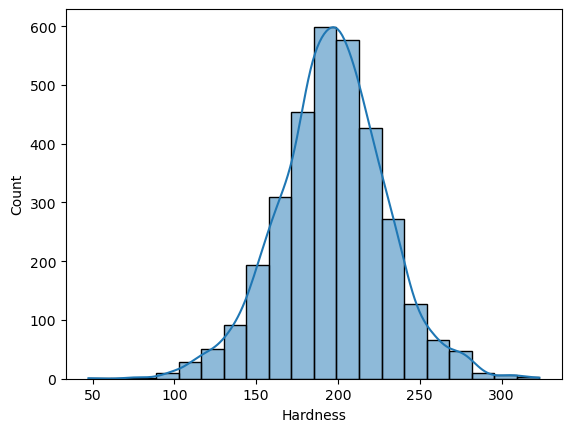

In [30]:
#Histogram of Hardness
sns.histplot(data['Hardness'], bins=20, kde=True)

<Axes: xlabel='ph', ylabel='Count'>

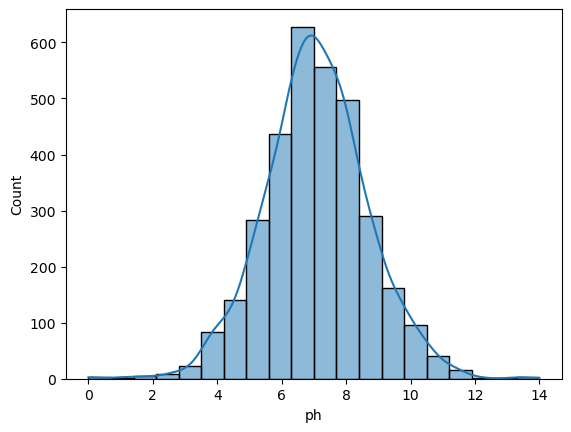

In [31]:
#Histogram of ph
sns.histplot(data['ph'], bins=20, kde=True)

<Axes: xlabel='Chloramines'>

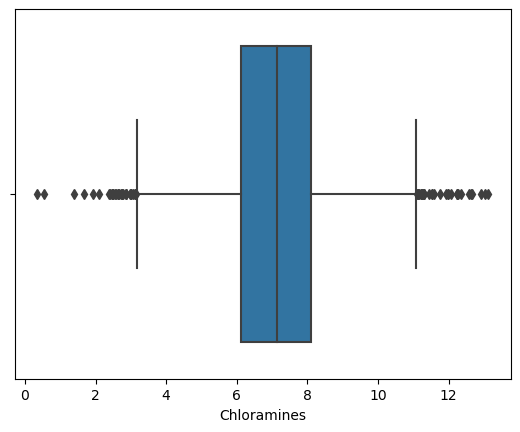

In [32]:
#Boxplot of Chloramines
sns.boxplot(x = 'Chloramines', data=data)

<Axes: xlabel='Sulfate'>

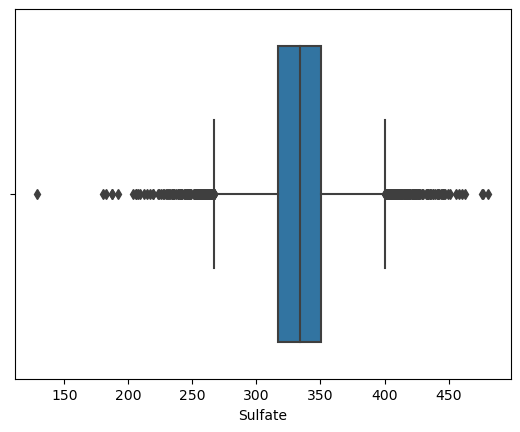

In [33]:
#Box plot of Sulfate
sns.boxplot(x = 'Sulfate', data=data)

<Axes: xlabel='Potability', ylabel='Turbidity'>

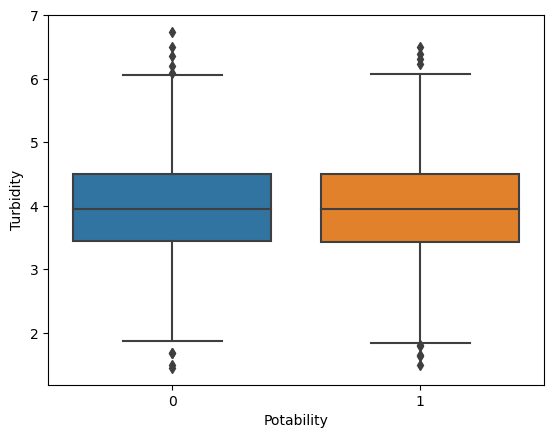

In [34]:
#Box plot of Potability vs Turbidity
sns.boxplot(y="Turbidity", x="Potability", data=data)

<Axes: xlabel='Hardness', ylabel='Sulfate'>

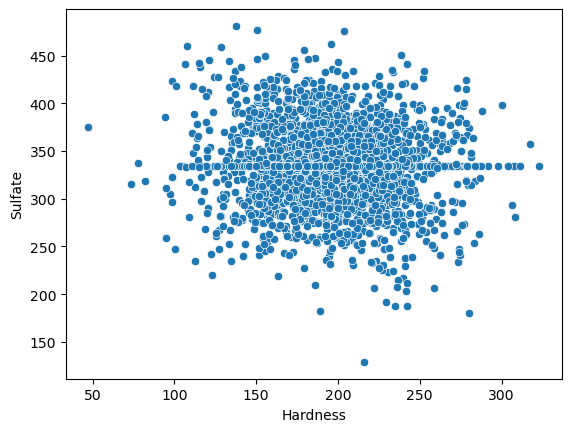

In [35]:
#Scatter plot of Hardness vs Sulfate
sns.scatterplot(x='Hardness', y='Sulfate', data=data)

<Axes: xlabel='Hardness', ylabel='Sulfate'>

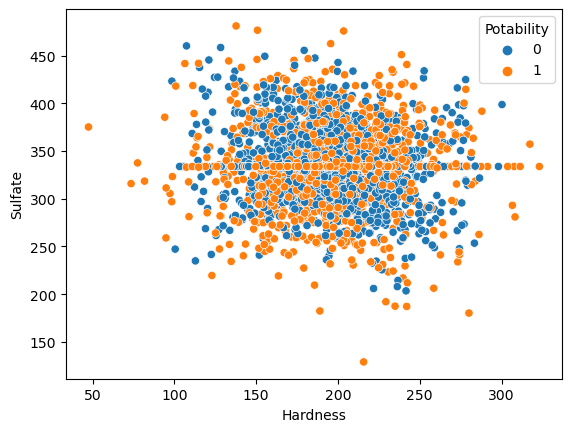

In [36]:
#Scatter plot of Hardness vs Sulfate with hue
sns.scatterplot(x='Hardness', y='Sulfate', hue='Potability', data=data)

<Axes: xlabel='Potability', ylabel='count'>

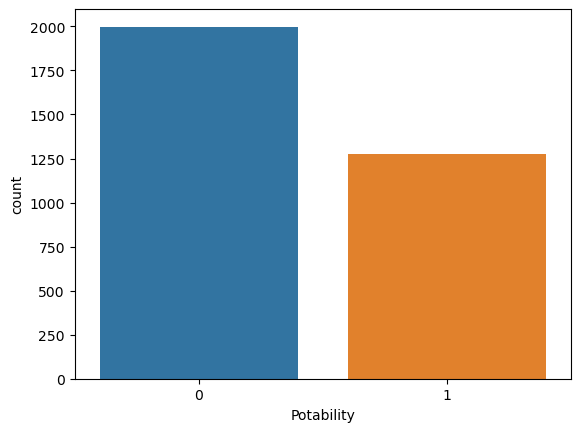

In [37]:
#Count plot of Potability
sns.countplot(x='Potability', data=data)

<Axes: xlabel='Potability', ylabel='ph'>

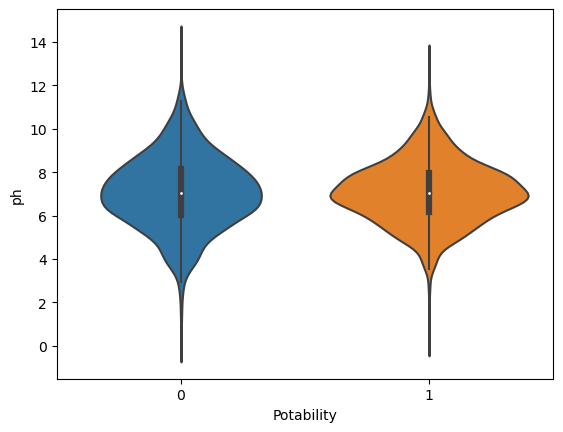

In [38]:
#Violin plot of Potability vs ph
sns.violinplot(x='Potability', y='ph', data=data)

<Axes: xlabel='Hardness'>

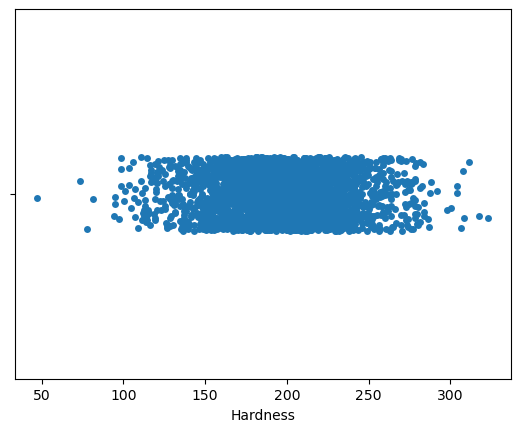

In [39]:
#Stripplot of Hardness
sns.stripplot(x='Hardness', data=data)

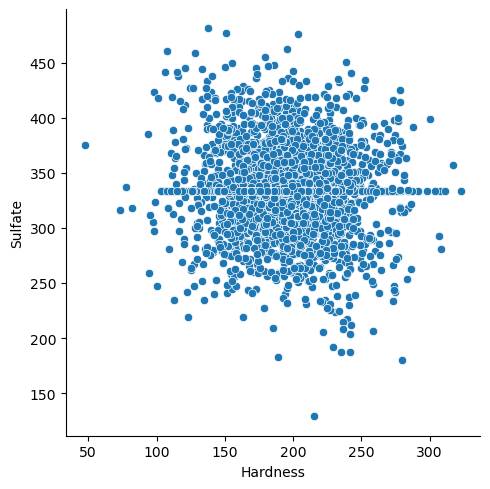

In [40]:
#Relplot of Hardness vs Sulfate
sns.relplot(x='Hardness', y='Sulfate', data=data)

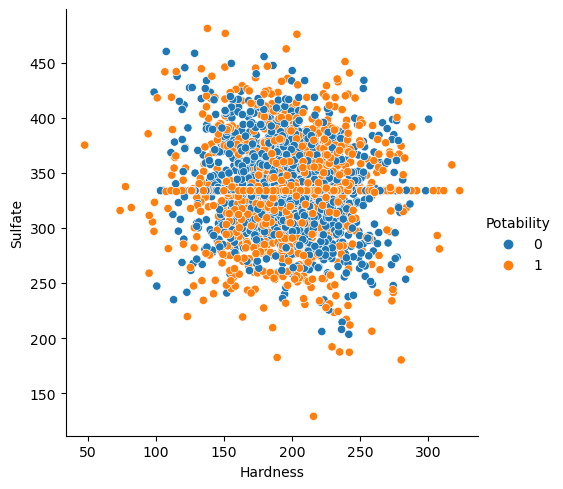

In [41]:
#Relplot of Hardness vs Sulfate with hue
sns.relplot(x='Hardness', y='Sulfate', hue='Potability', data=data)

<Axes: xlabel='Solids', ylabel='Density'>

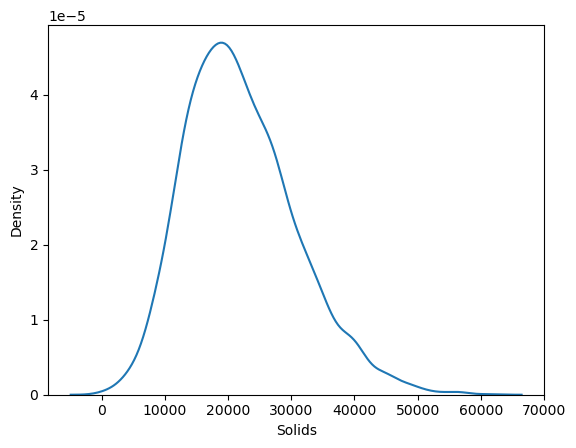

In [42]:
#kde plot of Solids
sns.kdeplot(x='Solids', data=data)

<Axes: xlabel='Solids', ylabel='Density'>

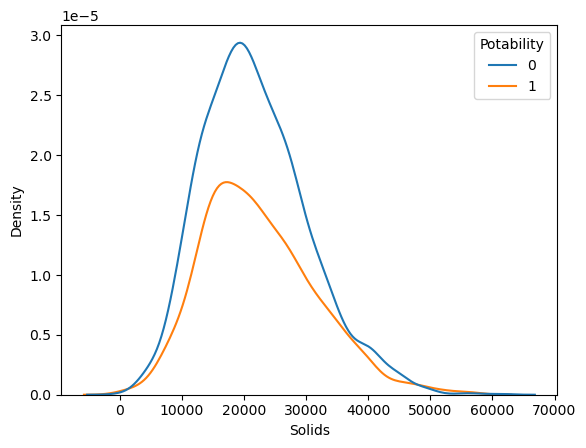

In [43]:
#kde plot of Solids with hue
sns.kdeplot(x='Solids', hue='Potability', data=data)

<Axes: xlabel='Potability', ylabel='Proportion'>

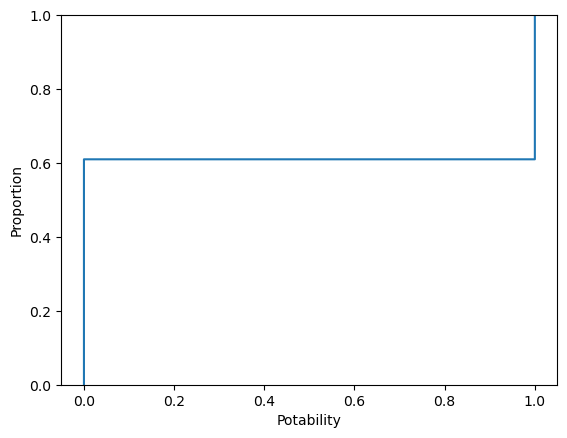

In [44]:
#Ecdf plot of Potability
sns.ecdfplot(x='Potability', data=data)

<Axes: xlabel='Hardness', ylabel='Sulfate'>

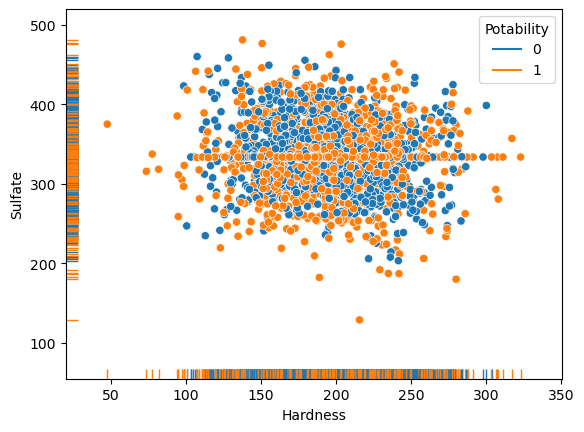

In [45]:
#Rug plot of Hardness vs Sulfate
sns.scatterplot(x='Hardness', y='Sulfate', hue='Potability', data=data)
sns.rugplot(x='Hardness', y='Sulfate', hue='Potability', data=data)

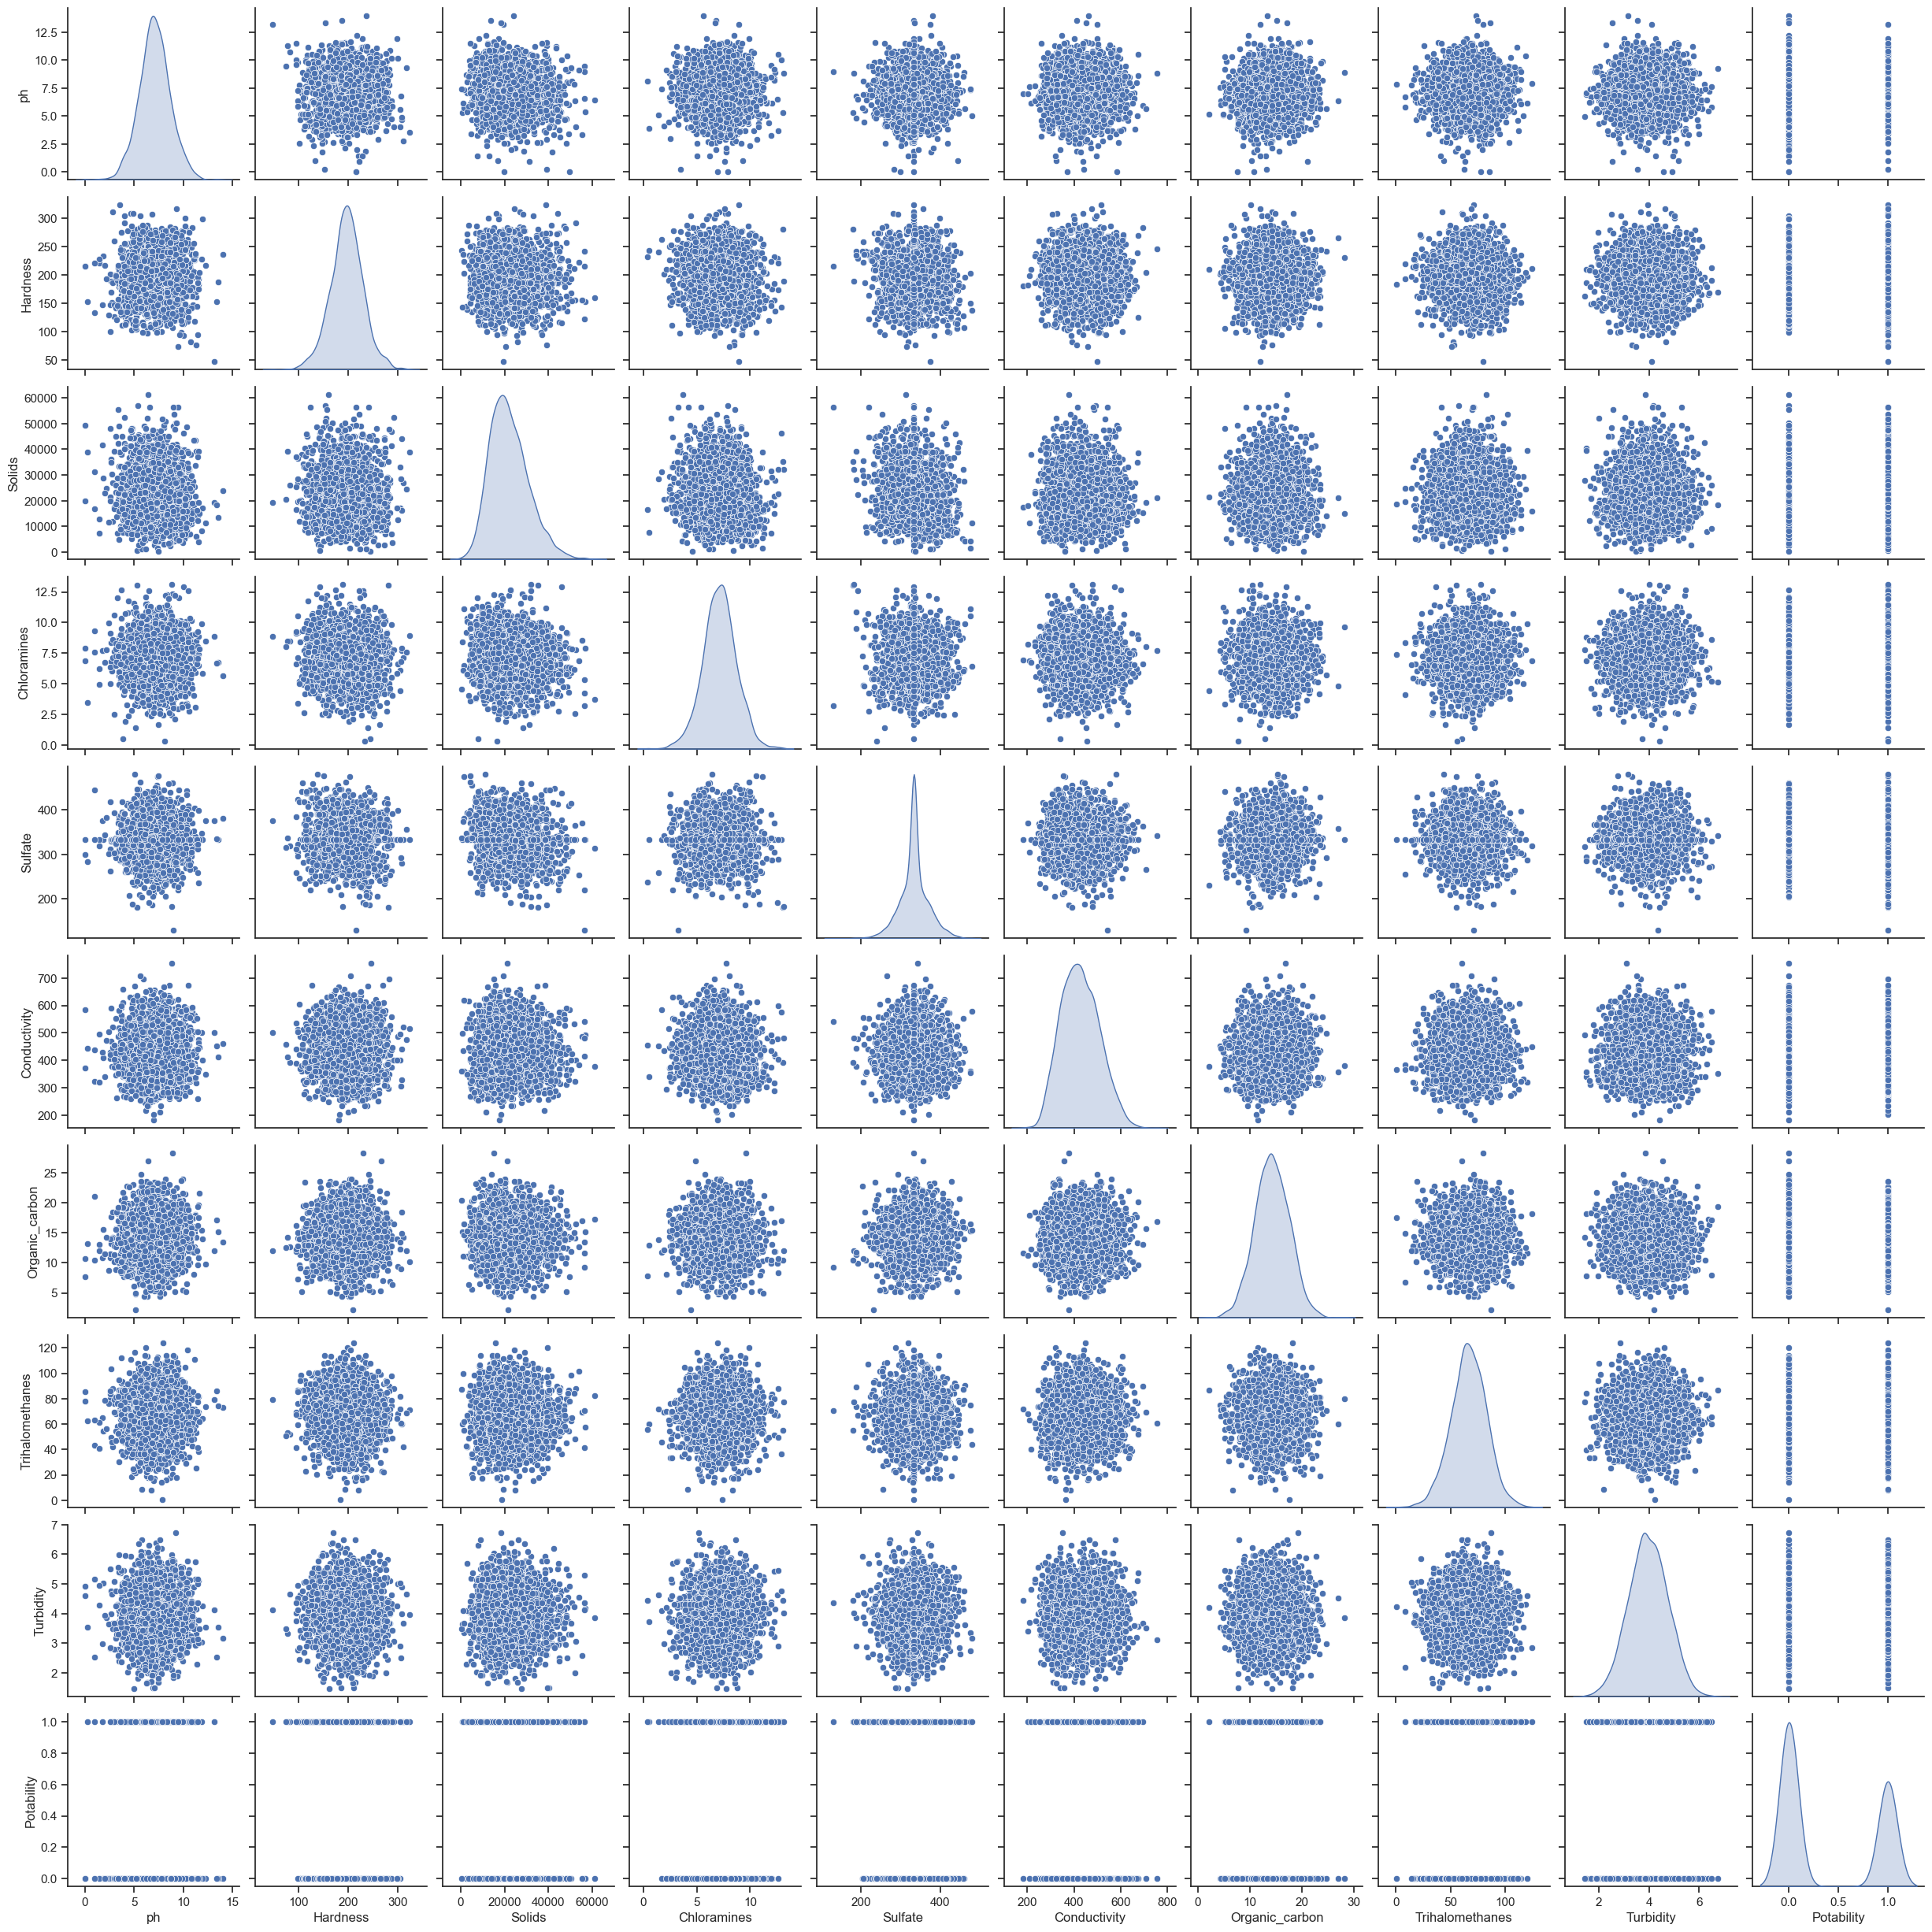

In [46]:
#Pair plot of data
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o")

# Linear Regression

In [47]:
#Handling Outlier

# Importing the zscore and then finding out the zscores values in 'Trihalomethanes' column, setting the threshold at 3 
# and then removing the outliers beyond the thershold value 

from scipy import stats
z_scores=stats.zscore(data["Trihalomethanes"])
z_score_outliers = (z_scores<-3)|(z_scores>3)

In [48]:
z_score_outlier_rows = data[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:              ph    Hardness        Solids  Chloramines     Sulfate  \
330    6.737004  220.100102  24694.744205     8.373660  333.775777   
531    6.145148  197.541072  39657.272108     9.900159  288.157883   
1075   6.767524  225.959092   9660.658302     8.827655  397.924240   
1123   5.803497  193.200991  19451.767603     4.146601  255.976746   
1156   5.036454  190.164520  29258.738136     4.991061  300.475925   
1157  10.415044  204.860505  24590.125934     7.774361  333.775777   
1360   8.281121  227.654351  17995.405219     7.493279  323.379987   
1630   7.058866  191.548401  16473.067089     8.435789  367.853180   
2121   6.946718  214.170043  32946.567518     5.484258  333.439570   
2376   7.899452  210.734124  15896.365937     6.907203  319.886957   
2949   7.783306  196.815952  24789.354734     6.548497  331.036776   
3035   7.869782  184.066169  18608.656297     7.411035  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbid

In [49]:
data.shape

(3276, 10)

In [50]:
x = (z_scores>-3)&(z_scores<3)

In [51]:
new_df = data[x]

In [52]:
new_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     3.716080  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.687695   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3264 rows x 10 columns]

In [53]:
new_df.head(1)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  3.71608  204.890455  20791.318981     7.300212  368.516441    564.308654   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783         86.99097   2.963135           0

In [54]:
# Importing the zscore and then finding out the zscores values in 'ph' column, setting the threshold at 3 
# and then removing the outliers beyond the thershold value

z_scores = stats.zscore(new_df["ph"])
z_score_outlier = (z_scores<-3)|(z_scores>3)

In [55]:
z_score_outlier_row=new_df[z_score_outlier]
print("outliers detected by Z-score:",z_score_outlier_row)

outliers detected by Z-score:              ph    Hardness        Solids  Chloramines     Sulfate  \
80     1.844538  233.764343  28689.595778     7.724432  333.775777   
263   13.175402   47.432000  19237.949676     8.907020  375.147315   
692    1.757037  147.581831  41538.242730     7.728177  376.012933   
726    0.227499  152.530111  39028.599340     3.462492  283.693782   
783   11.898078  228.132673   8296.550611     9.899637  346.649750   
810    0.989912  133.216942  16922.853899     9.293289  444.375731   
1303  12.246928  217.368014  11318.140563     8.465160  375.894758   
2075  14.000000  235.677458  24008.992040     5.635029  381.097711   
2646  11.907740  298.098679  17083.175085     5.878993  333.775777   
2868  13.541240  187.606792  13475.912773     6.756055  333.775777   
2895  13.349889  152.776455  18464.900775     6.717973  334.864070   
2898   1.431782  220.892705   7460.247260     4.987537  333.775777   
2899   1.431782  228.130383  12937.246891     6.214773  319.

In [56]:
p=(z_scores>-3)&(z_scores<3)
df_new=new_df[p]

In [57]:
df_new

ph    Hardness        Solids  Chloramines     Sulfate  \
0     3.716080  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.687695   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3246 rows x 10 columns]

In [58]:
#Data Preproceessing

X = data.drop(['ph'], axis=1)
Y = data['ph']                              # Predicting the ph

In [59]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
#Creating Linear Regression model 
model = LinearRegression()

In [61]:
#Training the model
model.fit(X_train, Y_train)

LinearRegression()

In [62]:
# Making predictions on the test set
Y_pred = model.predict(X_test)

In [63]:
#Model Evaluation

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

In [64]:
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)
print("R2 Score : ", r2)

Mean Absolute Error :  1.246122305062025
Mean Squared Error :  2.6047404150594637
Root Mean Squared Error :  1.6139208205669395
R2 Score :  0.01864790043887188


In [65]:
Y_mean = np.mean(Y_test)

# Calculating sum of squared residual
SSR = np.sum((Y_pred - Y_mean) ** 2)
print("Sum of squares residual : ", SSR)

Sum of squares residual :  22.634941287253902


In [66]:
# Calculating sum of squared total
SST = np.sum((Y_test - Y_mean) ** 2)
print("Sum of squares total : ", SST)

Sum of squares total :  1741.1790457707918


In [67]:
# Calculating sum of squared error
SSE = SST-SSR
print("Sum of squares error : ", SSE)

Sum of squares error :  1718.544104483538


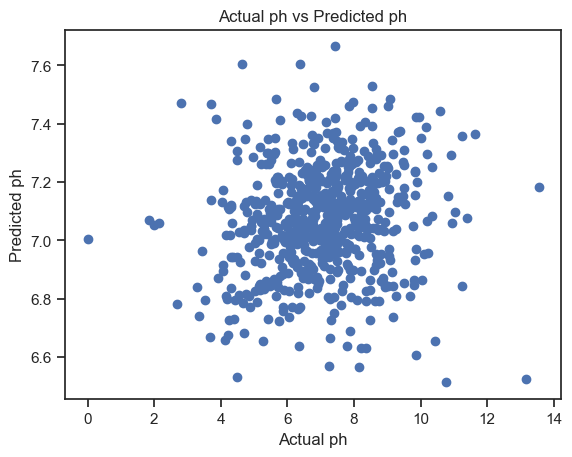

In [68]:
#Visualizing the Result

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual ph")
plt.ylabel("Predicted ph")
plt.title("Actual ph vs Predicted ph")
plt.show()

In [69]:
# Interpreting the model coefficients 
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

           Feature  Coefficient
0         Hardness     0.003431
1           Solids    -0.000011
2      Chloramines    -0.020661
3          Sulfate     0.000360
4     Conductivity     0.000278
5   Organic_carbon     0.022628
6  Trihalomethanes    -0.000350
7        Turbidity    -0.072736
8       Potability     0.001412


# Tuning - Linear Regression

In [70]:
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train, Y_train, cv=5)

In [71]:
#Training the model
lr_model.fit(X_train, Y_train)

LinearRegression()

In [72]:
#Making prediction ont the test set
lr_pred = lr_model.predict(X_test)

In [73]:
#Model Evaluation for Linear Regression
lr_mae = mean_absolute_error(Y_test, lr_pred)
lr_mse = mean_squared_error(Y_test, lr_pred)
lr_r2 = r2_score(Y_test, lr_pred)

In [74]:
print('Linear MAE : ', lr_mae)
print('Linear MSE : ', lr_mse)
print('Linear R2 : ', lr_r2)

Linear MAE :  1.246122305062025
Linear MSE :  2.6047404150594637
Linear R2 :  0.01864790043887188


In [75]:
ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X_train, Y_train, cv=5)

In [76]:
#Training the model for Ridge
ridge_model.fit(X_train, Y_train)

#Making prediction ont the test set
ridge_pred = ridge_model.predict(X_test)

#Model Evaluation for Ridge
ridge_mae = mean_absolute_error(Y_test, ridge_pred)
ridge_mse = mean_squared_error(Y_test, ridge_pred)
ridge_r2 = r2_score(Y_test, ridge_pred)

In [77]:
print('Ridge MAE : ', ridge_mae)
print('Ridge MSE : ', ridge_mse)
print('Ridge R2 : ', ridge_r2)

Ridge MAE :  1.246122568246577
Ridge MSE :  2.6047385399771064
Ridge R2 :  0.0186486068877747


In [78]:
lasso_model = Lasso(alpha=1.0)
lasso_scores = cross_val_score(lasso_model, X_train, Y_train, cv=5)

In [79]:
#Training the model for Lasso
lasso_model.fit(X_train, Y_train)

#Making prediction ont the test set
lasso_pred = lasso_model.predict(X_test)

#Model Evaluation for Lasso
lasso_mae = mean_absolute_error(Y_test, lasso_pred)
lasso_mse = mean_squared_error(Y_test, lasso_pred)
lasso_r2 = r2_score(Y_test, lasso_pred)

In [80]:
print('Lasso MAE : ', lasso_mae)
print('Lasso MSE : ', lasso_mse)
print('Lasso R2 : ', lasso_r2)

Lasso MAE :  1.2529415484080086
Lasso MSE :  2.6221976939390186
Lasso R2 :  0.012070762393933898


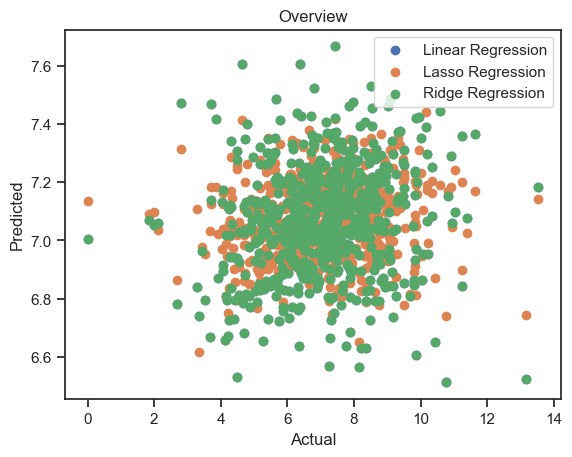

In [81]:
#Plot for all
plt.scatter(Y_test, lr_pred, alpha=1.0, label='Linear Regression')
plt.scatter(Y_test, lasso_pred, alpha=1.0, label='Lasso Regression')
plt.scatter(Y_test, ridge_pred, alpha=1.0, label='Ridge Regression')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Overview')
plt.legend()

# Robust Techniques - Linear Regression

In [82]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor

In [83]:
#Huber Regressor
huber = HuberRegressor()

In [84]:
huber.fit(X_train, Y_train)

HuberRegressor()

In [85]:
huber_pred = huber.predict(X_test)

In [86]:
huber_mae = mean_absolute_error(Y_test, huber_pred)
huber_mse = mean_squared_error(Y_test, huber_pred)
huber_r2 = r2_score(Y_test, huber_pred)

In [87]:
print('Huber MAE : ', huber_mae)
print('Huber MSE : ', huber_mse)
print('Huber R2 Score : ', huber_r2)

Huber MAE :  1.2721881772677248
Huber MSE :  2.762738852497971
Huber R2 Score :  -0.040878990383420355


In [88]:
#RANSAC Regressor
ransac = RANSACRegressor()

In [89]:
ransac.fit(X_train, Y_train)

RANSACRegressor()

In [90]:
ransac_pred = ransac.predict(X_test)

In [91]:
ransac_mae = mean_absolute_error(Y_test, ransac_pred)
ransac_mse = mean_squared_error(Y_test, ransac_pred)
ransac_r2 = r2_score(Y_test, ransac_pred)

In [92]:
print('Ransac MAE : ', ransac_mae)
print('Ransac MSE : ', ransac_mse)
print('Ransac R2 Score : ', ransac_r2)

Ransac MAE :  1.550876560895594
Ransac MSE :  4.269972310344642
Ransac R2 Score :  -0.6087385397784193


# Logistic Regression

In [93]:
#Data Preproceessing

X = data.drop(['Potability'], axis=1)
Y = data['Potability']                              # Predicting the ph

In [94]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [95]:
#Creating Logistic Regression model 
model = LogisticRegression()

In [96]:
#Training the model
model.fit(X_train, Y_train)

LogisticRegression()

In [97]:
#Calculating Train Score
print('Train Score : ', model.score(X_train, Y_train))

Train Score :  0.6061068702290077


In [98]:
#Calculating Test Score
print('Test Score : ', model.score(X_test, Y_test))

Test Score :  0.6280487804878049


In [99]:
#Predicting the train value
pred_train = model.predict(X_train)

In [100]:
#Predicting the test value
pred_test = model.predict(X_test)

In [101]:
#Classification report for the Training set
print(metrics.classification_report(Y_train, pred_train))

              precision    recall  f1-score   support

           0       0.61      1.00      0.75      1586
           1       1.00      0.00      0.00      1034

    accuracy                           0.61      2620
   macro avg       0.80      0.50      0.38      2620
weighted avg       0.76      0.61      0.46      2620



In [102]:
#Classification report for the Testing set
print(metrics.classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



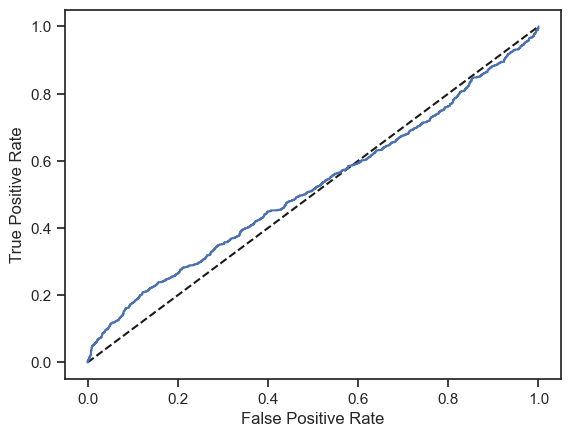

In [103]:
#AUC-ROC curve is plotted 
roc = model.predict_proba(X_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [104]:
#ROC-AUC Score
metrics.roc_auc_score(Y_train, roc)

0.5180654713267201

# Tuning - logistic Regression

In [105]:
# Defining hyperparameters and their possible values for tuning
param_grid = {
    'penalty' : ['l1', 'l2'],                         #l1 lasso l2 Ridge
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [106]:
# Creating a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [107]:
# Fitting the GridSearchCV object to the training data
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [108]:
# Getting the best hyperparameters
best_param = grid.best_params_

# Getting the best model
best_model = grid.best_estimator_

In [109]:
# Making predictions on the test set
Y_pred = best_model.predict(X_test)

In [110]:
# Evaluating the best model
acc_log = accuracy_score(Y_test, Y_pred)
pre = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

In [111]:
print('Best Param :  ', best_param)
print('Accuracy : ', acc_log)               #Accuracy is the proportion of correct predictions over total predictions. 
print('Precision : ', pre)              #Precision measures how good our model is when the prediction is positive. 
print("Recall : ", rec)                 #Recall measures how good our model is at correctly predicting positive classes.
print('Fl Score : ', f1)                # F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. 
print('ROC-AUC Score : ', roc_auc)      #The ROC AUC score tells us how efficient the model is.

Best Param :   {'C': 0.1, 'penalty': 'l2'}
Accuracy :  0.6280487804878049
Precision :  0.0
Recall :  0.0
Fl Score :  0.0
ROC-AUC Score :  0.5


In [112]:
#Confusion Matrix after Grid Search
confusion = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[412   0]
 [244   0]]


In [113]:
#Classification report after Grid Search
classification_rep = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [114]:
# Defining hyperparameters and their possible values for tuning
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4)  # Random values between 0 and 4 for regularization strength (C)
}

In [115]:
# Creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [116]:
# Fitting the RandomizedSearchCV object to the training data
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022EC3330AD0>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [117]:
# Getting the best hyperparameters
best_params = random_search.best_params_

In [118]:
# Getting the best model
best_model = random_search.best_estimator_

In [119]:
# Making predictions on the test set
Y_pred = best_model.predict(X_test)

In [120]:
# Evaluating the best model
acc = accuracy_score(Y_test, Y_pred)
pre = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

In [121]:
print('Best Param :  ', best_param)
print('Accuracy : ', acc)
print('Precision : ', pre)
print("Recall : ", rec)
print('Fl Score : ', f1)
print('ROC-AUC Score : ', roc_auc)

Best Param :   {'C': 0.1, 'penalty': 'l2'}
Accuracy :  0.6280487804878049
Precision :  0.0
Recall :  0.0
Fl Score :  0.0
ROC-AUC Score :  0.5


In [122]:
#Confusion Matrix after Randomized Search
confusion = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[412   0]
 [244   0]]


In [123]:
#Classification report after Randomized Search
classification_rep = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



# SVM

In [124]:
#Data Preproceessing

X = data.drop(['Potability'], axis=1)
Y = data['Potability']                              # Predicting the ph

In [125]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [126]:
X_train.shape

(2620, 9)

In [127]:
X_test.shape

(656, 9)

In [128]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
#Running with default hyperparameter
svc = SVC()

In [130]:
svc.fit(X_train, Y_train)

SVC()

In [131]:
Y_pred = svc.predict(X_test)

In [132]:
#Accuracy of SVM model
acc_svm = accuracy_score(Y_test, Y_pred)
print("Accuracy Score with default parameter : {:.2f}%". format(acc_svm*100))

Accuracy Score with default parameter : 69.66%


In [133]:
#Classification report of SVM model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.69      0.33      0.45       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.70      0.70      0.66       656



In [134]:
#Confusion Matrix of SVM model
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[376  36]
 [163  81]]
True Positives(TP) =  376
True Negatives(TN) =  81
False Positives(FP) =  36
False Negatives(FN) =  163


<Axes: >

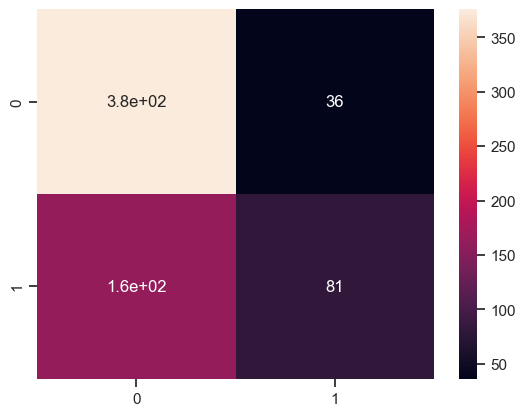

In [135]:
sns.heatmap(cm, annot=True)

In [136]:
yb = label_binarize(Y, classes=[0,1])

In [137]:
nc = yb.shape[1]

In [138]:
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [139]:
Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

In [140]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range (nc):
    fpr, tpr, _ = roc_curve(Y_test, Y_score)
    roc_auc = auc(fpr, tpr)

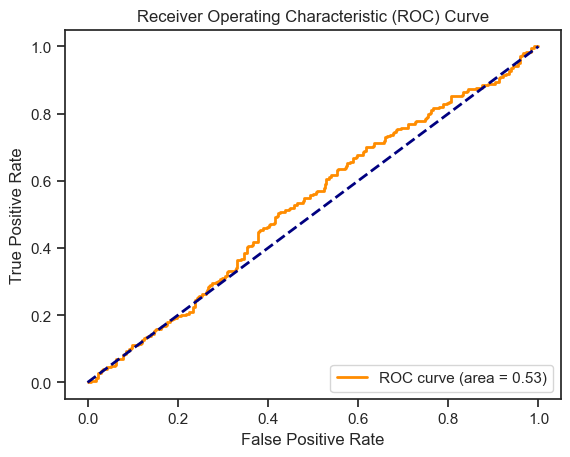

In [141]:
##AUC-ROC curve is plotted 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [142]:
#SVM with linear kernel

linear_svc = SVC(kernel='linear')

In [143]:
linear_svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [144]:
Y_predLinear = linear_svc.predict(X_test)

In [145]:
acc = accuracy_score(Y_test, Y_predLinear)
print("Accuracy Score with Linear Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Linear Kernel : 62.80%


In [146]:
print(classification_report(Y_test, Y_predLinear))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [147]:
cm = confusion_matrix(Y_test, Y_predLinear)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[412   0]
 [244   0]]
True Positives(TP) =  412
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  244


<Axes: >

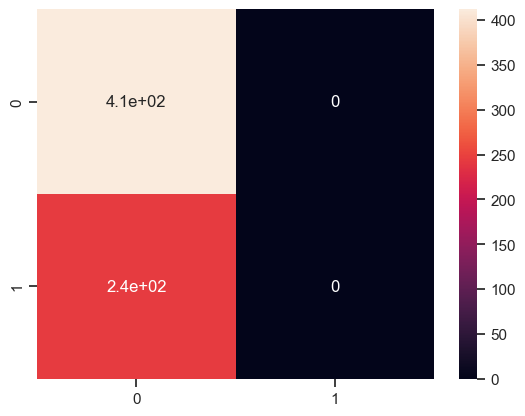

In [148]:
sns.heatmap(cm, annot=True)

In [149]:
#SVM with RBF Kernel

rbf_svc = SVC(kernel='rbf')

In [150]:
rbf_svc.fit(X_train, Y_train)

SVC()

In [151]:
Y_predRBF = rbf_svc.predict(X_test)

In [152]:
acc = accuracy_score(Y_test, Y_predRBF)
print("Accuracy Score with RBF Kernel : {:.2f}%". format(acc*100))

Accuracy Score with RBF Kernel : 69.66%


In [153]:
print(classification_report(Y_test, Y_predRBF))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.69      0.33      0.45       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.70      0.70      0.66       656



In [154]:
cm = confusion_matrix(Y_test, Y_predRBF)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[376  36]
 [163  81]]
True Positives(TP) =  376
True Negatives(TN) =  81
False Positives(FP) =  36
False Negatives(FN) =  163


<Axes: >

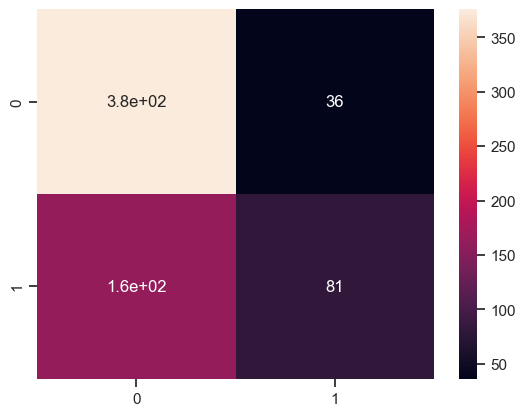

In [155]:
sns.heatmap(cm, annot=True)

In [156]:
#SVM with Sigmoid Kernel

sigmoid_svc = SVC(kernel='sigmoid')

In [157]:
sigmoid_svc.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [158]:
Y_predsigmoid = sigmoid_svc.predict(X_test)

In [159]:
acc = accuracy_score(Y_test, Y_predsigmoid)
print("Accuracy Score with Sigmoid Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Sigmoid Kernel : 57.62%


In [160]:
print(classification_report(Y_test, Y_predsigmoid))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68       412
           1       0.42      0.36      0.39       244

    accuracy                           0.58       656
   macro avg       0.54      0.53      0.53       656
weighted avg       0.56      0.58      0.57       656



In [161]:
cm = confusion_matrix(Y_test, Y_predsigmoid)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[289 123]
 [155  89]]
True Positives(TP) =  289
True Negatives(TN) =  89
False Positives(FP) =  123
False Negatives(FN) =  155


<Axes: >

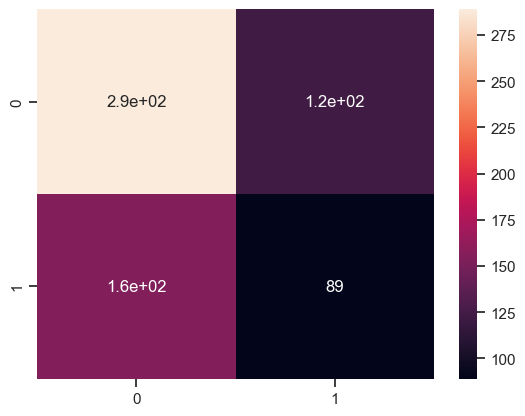

In [162]:
sns.heatmap(cm, annot=True)

In [163]:
#SVM with Polynomial Kernel

poly_svc = SVC(kernel='poly')

In [164]:
poly_svc.fit(X_train, Y_train)

SVC(kernel='poly')

In [165]:
Y_predPoly = poly_svc.predict(X_test)

In [166]:
acc = accuracy_score(Y_test, Y_predPoly)
print("Accuracy Score with Polynomial Kernel : {:.2f}%". format(acc*100))

Accuracy Score with Polynomial Kernel : 62.80%


In [167]:
print(classification_report(Y_test, Y_predPoly))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       412
           1       0.50      0.04      0.07       244

    accuracy                           0.63       656
   macro avg       0.57      0.51      0.42       656
weighted avg       0.58      0.63      0.51       656



In [168]:
cm = confusion_matrix(Y_test, Y_predPoly)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[403   9]
 [235   9]]
True Positives(TP) =  403
True Negatives(TN) =  9
False Positives(FP) =  9
False Negatives(FN) =  235


<Axes: >

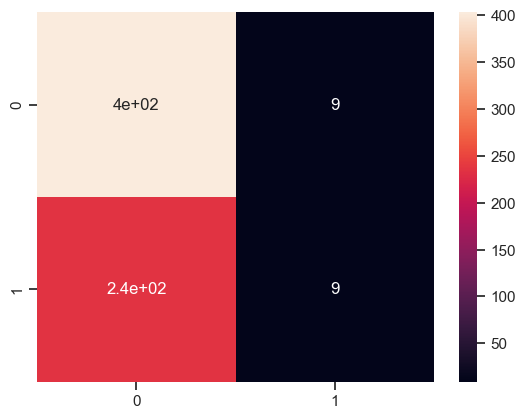

In [169]:
sns.heatmap(cm, annot=True)

# Tuning - SVM

In [170]:
#Grid Search

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [171]:
svcm = SVC()

In [172]:
grid_search = GridSearchCV(svcm, param_grid, cv=5)

In [173]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [174]:
best_param = grid_search.best_params_
print("Best hyperparameter : ", best_param)

Best hyperparameter :  {'C': 1, 'kernel': 'rbf'}


In [175]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [176]:
best_svm.fit(X_train, Y_train)

SVC(C=1)

In [177]:
Y_pred = best_svm.predict(X_test)

In [178]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy after Grid Search : {:.2f}%". format(acc * 100))

Accuracy after Grid Search : 69.66%


In [179]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.69      0.33      0.45       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.70      0.70      0.66       656



In [180]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[376  36]
 [163  81]]
True Positives(TP) =  376
True Negatives(TN) =  81
False Positives(FP) =  36
False Negatives(FN) =  163


<Axes: >

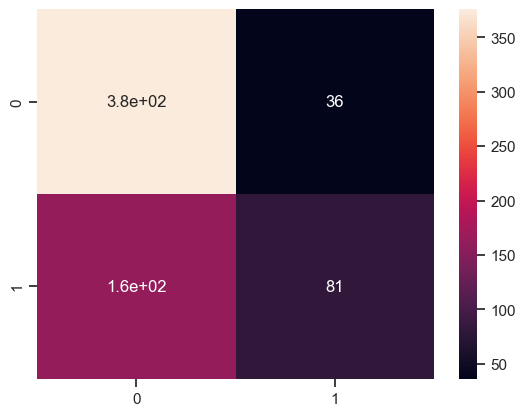

In [181]:
sns.heatmap(cm, annot=True)

In [182]:
#Tuning the model with Random Search

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [183]:
svcm = SVC()

In [184]:
random_search = RandomizedSearchCV(svcm, param_grid, cv=5)

In [185]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [186]:
best_param = random_search.best_params_
print("Best Parameter : ", best_param)

Best Parameter :  {'kernel': 'rbf', 'C': 1}


In [187]:
best_svm = SVC(C=best_param['C'], kernel=best_param['kernel'])

In [188]:
best_svm.fit(X_train, Y_train)

SVC(C=1)

In [189]:
Y_pred = best_svm.predict(X_test)

In [190]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy after Randomized Search: {:.2f}%" . format(acc * 100))

Accuracy after Randomized Search: 69.66%


In [191]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       412
           1       0.69      0.33      0.45       244

    accuracy                           0.70       656
   macro avg       0.69      0.62      0.62       656
weighted avg       0.70      0.70      0.66       656



In [192]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[376  36]
 [163  81]]
True Positives(TP) =  376
True Negatives(TN) =  81
False Positives(FP) =  36
False Negatives(FN) =  163


<Axes: >

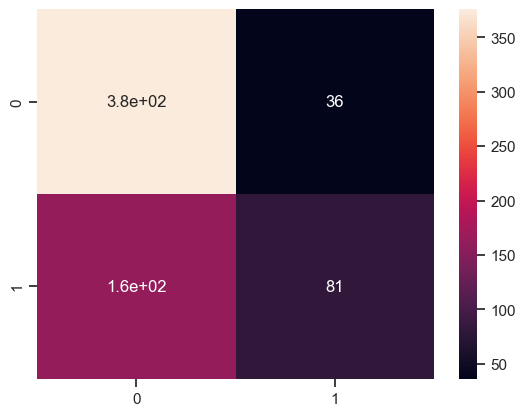

In [193]:
sns.heatmap(cm, annot=True)

# Naive Bayes 

In [194]:
from sklearn.preprocessing import MinMaxScaler

#Min max scaler is used in order to convert all values of X in the range of 0 to 1.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
#choosing the naive bayes 
bayes = naive_bayes.MultinomialNB()

In [196]:
#Training the model
bayes.fit(X_train, Y_train)

MultinomialNB()

In [197]:
#Making prediction on the test set
Y_pred = bayes.predict(X_test)

In [198]:
#Accuracy of Naive Bayes model
acc_nb = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy Score of Naive Bayes : {:.2f}%". format(acc_nb*100))

Accuracy Score of Naive Bayes : 62.80%


In [199]:
#Classification report of Nave bayes Model
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [200]:
#Confusion matrix of Nave bayes Model
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[412   0]
 [244   0]]
True Positives(TP) =  412
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  244


<Axes: >

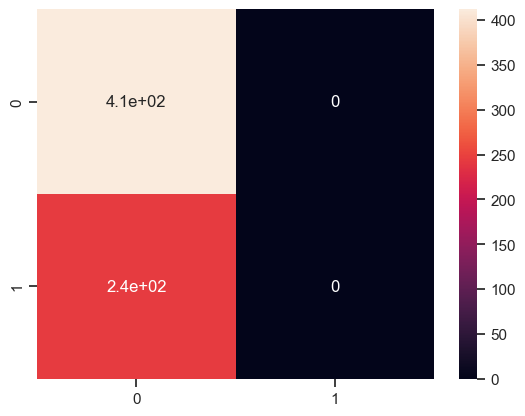

In [201]:
sns.heatmap(cm, annot=True)

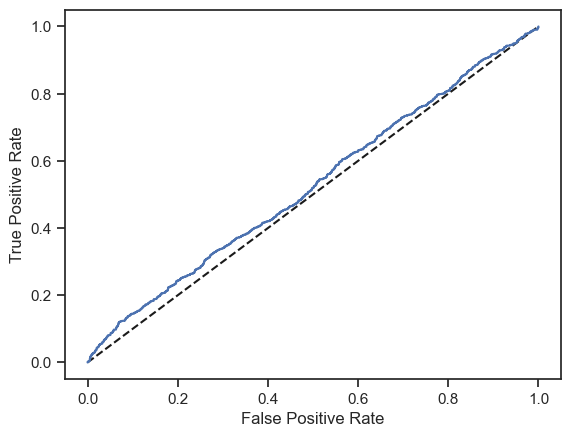

In [202]:
#Plotting the ROC Curve
roc = bayes.predict_proba(X_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Tuning - Naive Bayes 

In [203]:
#Grid Search
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

In [204]:
bayes = naive_bayes.MultinomialNB()

In [205]:
grid_search = GridSearchCV(bayes, param_grid, cv=5)

In [206]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [207]:
best_param = grid_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.1, 'fit_prior': True}


In [208]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])

In [209]:
best_nb.fit(X_train, Y_train)

MultinomialNB(alpha=0.1)

In [210]:
Y_pred = best_nb.predict(X_test)

In [211]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Grid Search : {:.2f}%". format(acc*100))

Accuracy Score after Grid Search : 62.80%


In [212]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [213]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[412   0]
 [244   0]]
True Positives(TP) =  412
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  244


<Axes: >

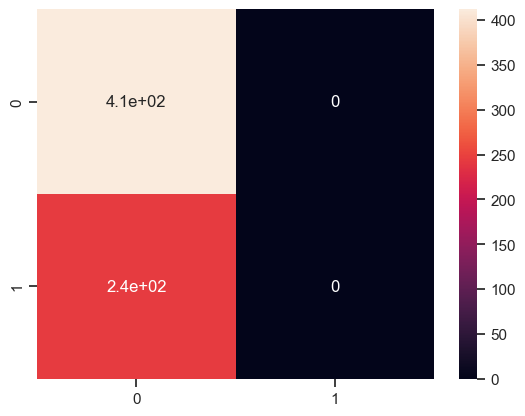

In [214]:
sns.heatmap(cm, annot=True)

In [215]:
#Naive Bayes - Randomized Search

param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

In [216]:
bayes = naive_bayes.MultinomialNB()

In [217]:
random_search = RandomizedSearchCV(bayes, param_grid, cv=5)

In [218]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': [0.1, 1, 10, 100],
                                        'fit_prior': [True, False]})

In [219]:
best_param = random_search.best_params_
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'fit_prior': True, 'alpha': 0.1}


In [220]:
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior = best_param['fit_prior'])

In [221]:
best_nb.fit(X_train, Y_train)

MultinomialNB(alpha=0.1)

In [222]:
Y_pred = best_nb.predict(X_test)

In [223]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy Score after Randomized Search : {:.2f}%". format(acc*100))

Accuracy Score after Randomized Search : 62.80%


In [224]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [225]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[412   0]
 [244   0]]
True Positives(TP) =  412
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  244


<Axes: >

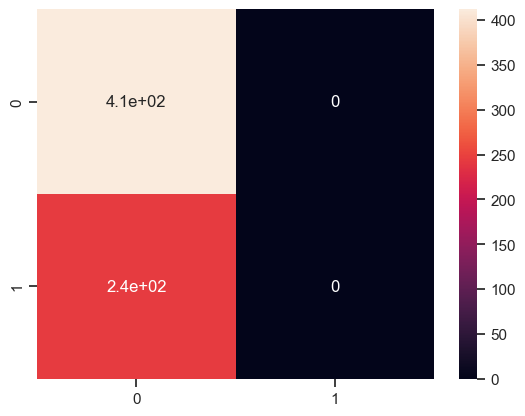

In [226]:
sns.heatmap(cm, annot=True)

# K-Nearest Neighbor (KNN)

In [227]:
#Data Preproceessing

X = data.drop(['Potability'], axis=1)
Y = data['Potability']                              # Predicting the ph

In [228]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [229]:
knn = KNeighborsClassifier(n_neighbors=10)

#Training the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [230]:
knn.score(X_test,Y_test)

0.5823170731707317

In [231]:
#Making prediction on test set
Y_pred= knn.predict(X_test)

In [232]:
#Accuracy of KNN model
acc_knn = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc_knn)

Accuracy: 0.5823170731707317


In [233]:
#Classification report of KNN model
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.84      0.72       412
           1       0.35      0.14      0.20       244

    accuracy                           0.58       656
   macro avg       0.49      0.49      0.46       656
weighted avg       0.52      0.58      0.52       656



In [234]:
#Confusion Matrix of KNN model
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[348  64]
 [210  34]]
True Positives(TP) =  348
True Negatives(TN) =  34
False Positives(FP) =  64
False Negatives(FN) =  210


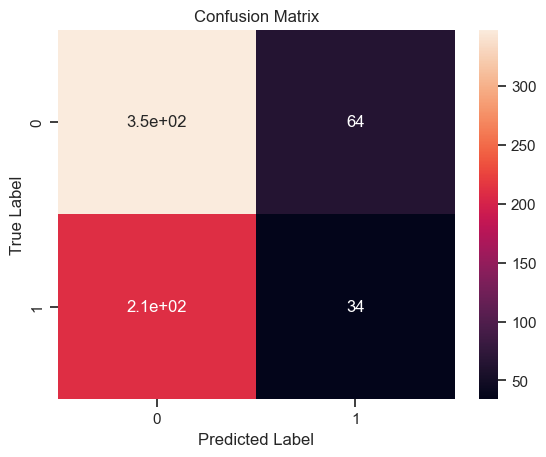

In [235]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

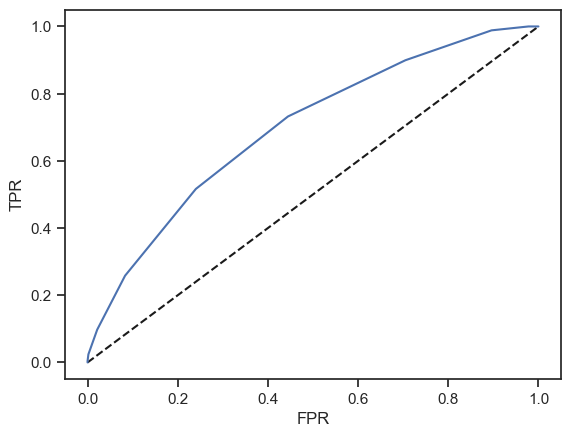

In [236]:
#AUC-ROC curve is plotted 
roc=knn.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train,roc)
plt.plot([0,1], [0,1],'k--') #x=(0,1) y
plt.plot(fpr,tpr,label='KNN')
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

# Tuning - KNN

In [237]:
#Grid Search

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [238]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [239]:
best_param = grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'], weights = best_param['weights'],p=best_param['p'])
best_knn.fit(X_train, Y_train)
Y_pred = best_knn.predict(X_test)

In [240]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [241]:
acc = accuracy_score(Y_test, Y_pred)
acc

0.5670731707317073

In [242]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       412
           1       0.38      0.25      0.30       244

    accuracy                           0.57       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.53      0.57      0.54       656



In [243]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[312 100]
 [184  60]]
True Positives(TP) =  312
True Negatives(TN) =  60
False Positives(FP) =  100
False Negatives(FN) =  184


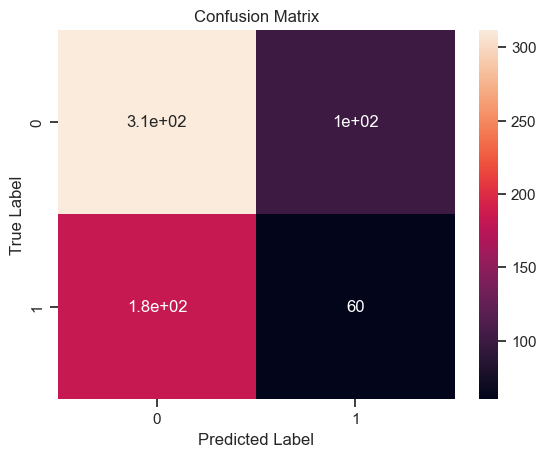

In [244]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [245]:
# Evaluating the best model using cross-validation
cross_val_scores = cross_val_score(best_knn, X, Y, cv=5, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()
print(f"Cross-Validation Mean Accuracy: {mean_accuracy:.2f}")

Cross-Validation Mean Accuracy: 0.57


In [246]:
#Choosing the right k

# Define a range of k values to explore
k_values = list(range(1, 21))  # Explore k values from 1 to 20

In [247]:
# Initialize lists to store mean accuracy for each k
mean_accuracies = []

In [248]:
# Iterate through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation with k neighbors
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

In [249]:
# Find the optimal k
optimal_k = k_values[mean_accuracies.index(max(mean_accuracies))]

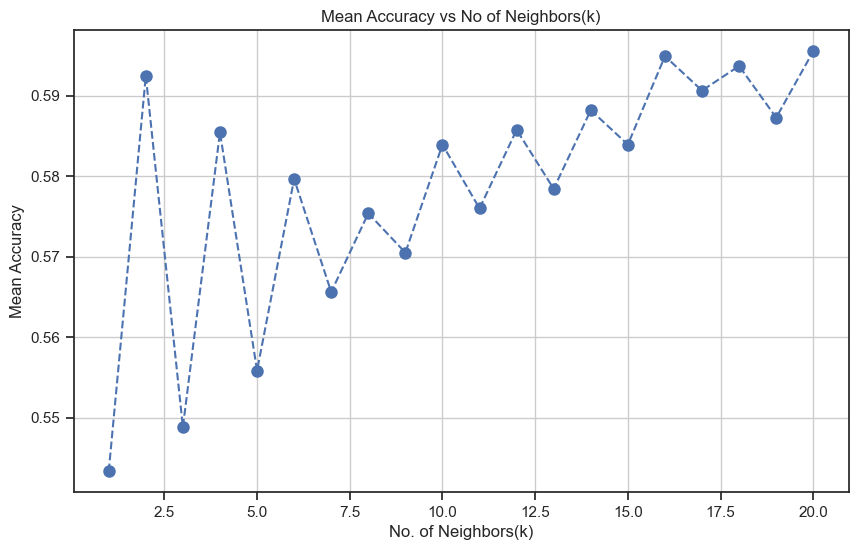

In [250]:
# Plot the mean accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='dashed', markersize=8)
plt.title("Mean Accuracy vs No of Neighbors(k)")
plt.xlabel("No. of Neighbors(k)")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.show()

In [251]:
#Print the optimal k
print("Optimal k : ", optimal_k)

Optimal k :  20


In [252]:
#Dimensional Reduction

from sklearn.decomposition import PCA

# Perform dimensionality reduction using PCA
pca = PCA(n_components=5)  # You can choose the number of components based on your dataset
X_reduced = pca.fit_transform(X)

In [253]:
# Split the reduced data into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

In [254]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [255]:
# Create the KNN classifier
knn = KNeighborsClassifier()

In [256]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [257]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [258]:
# Fit the model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=9, p=1)

In [259]:
# Make predictions on the test data
Y_pred = best_knn.predict(X_test)

In [260]:
# Evaluate the model
print("Best Hyperparameter : ", best_param)
acc = accuracy_score(Y_test, Y_pred)
print("Acuuracy : ", acc)

Best Hyperparameter :  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Acuuracy :  0.5792682926829268


In [261]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       412
           1       0.40      0.25      0.31       244

    accuracy                           0.58       656
   macro avg       0.52      0.51      0.50       656
weighted avg       0.55      0.58      0.55       656



In [262]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[318  94]
 [182  62]]
True Positives(TP) =  318
True Negatives(TN) =  62
False Positives(FP) =  94
False Negatives(FN) =  182


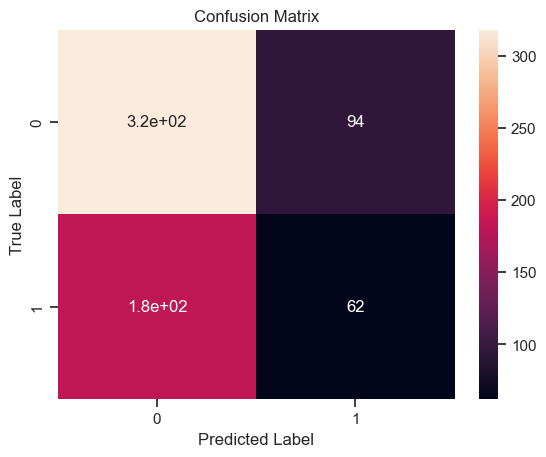

In [263]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [264]:
#Euclidean method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [265]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [266]:
Y_pred = knn_classifier.predict(X_test)

In [267]:
accuracy = accuracy_score(Y_test, Y_pred)  # For classification
print('accuracy:',accuracy)

accuracy: 0.5823170731707317


In [268]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.84      0.72       412
           1       0.35      0.14      0.20       244

    accuracy                           0.58       656
   macro avg       0.49      0.49      0.46       656
weighted avg       0.52      0.58      0.52       656



In [269]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[348  64]
 [210  34]]
True Positives(TP) =  348
True Negatives(TN) =  34
False Positives(FP) =  64
False Negatives(FN) =  210


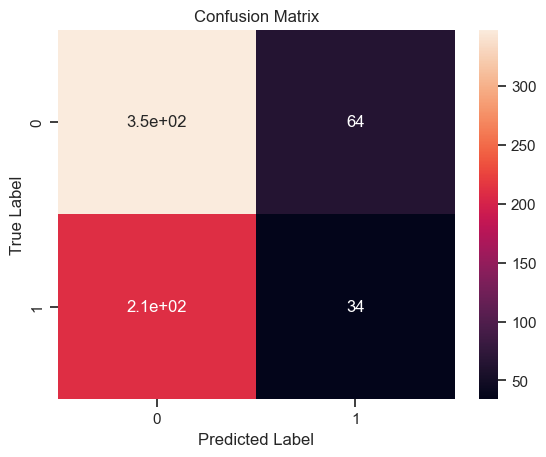

In [270]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [271]:
#Manhatan distance method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

In [272]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [273]:
Y_pred = knn_classifier.predict(X_test)

In [274]:
accuracy = accuracy_score(Y_test, Y_pred) 
print('accuracy:',accuracy)

accuracy: 0.5929878048780488


In [275]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       412
           1       0.37      0.14      0.20       244

    accuracy                           0.59       656
   macro avg       0.50      0.50      0.46       656
weighted avg       0.53      0.59      0.53       656



In [276]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[356  56]
 [211  33]]
True Positives(TP) =  356
True Negatives(TN) =  33
False Positives(FP) =  56
False Negatives(FN) =  211


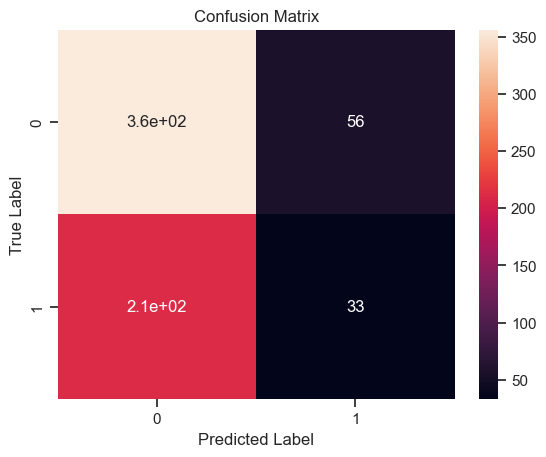

In [277]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [278]:
#Minkowsky distance method

knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)

In [279]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [280]:
Y_pred = knn_classifier.predict(X_test)

In [281]:
accuracy = accuracy_score(Y_test, Y_pred)  # For classification
print('accuracy:',accuracy)

accuracy: 0.5823170731707317


In [282]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.84      0.72       412
           1       0.35      0.14      0.20       244

    accuracy                           0.58       656
   macro avg       0.49      0.49      0.46       656
weighted avg       0.52      0.58      0.52       656



In [283]:
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[348  64]
 [210  34]]
True Positives(TP) =  348
True Negatives(TN) =  34
False Positives(FP) =  64
False Negatives(FN) =  210


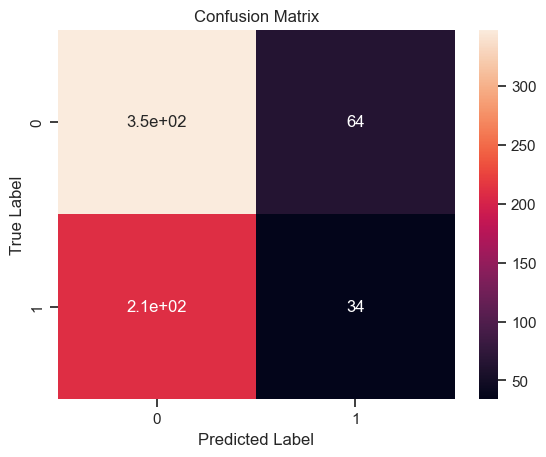

In [284]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [285]:
# Create a dictionary to store accuracy values for each model
df_acc = {
    "Model": ["Linear Regression", "Logistic Regression", "SVM", "Naive Bayes", "k-NN"],
    "Accuracy": [r2, acc_log, acc_svm, acc_nb, acc_knn]
}

# Create a Pandas DataFrame from the dictionary
accuracy_df = pd.DataFrame(df_acc)

# Display the DataFrame as a table
accuracy_df

Model  Accuracy
0    Linear Regression  0.018648
1  Logistic Regression  0.628049
2                  SVM  0.696646
3          Naive Bayes  0.628049
4                 k-NN  0.582317

#### After performing different types of algorithm on the predictive maintenance of machine dataset we could see that each algorithm's model perform differently in order to classify the data and providing accuracy of doing the same. from the table above we can clearly conclude that the linear regression model is not performing well on the dataset giving us accuracy of 1.8 % only which shows how poorly it gives the relation between dependent and independent variables. In classification models however the accuracies of all the models i.e. logistic,SVM,naive bayes,knn are all above 60% showing that their ability to classify the data is not really well, but if we want to choose one model out of these we would go for SVM as its accuracy is highest.